<a href="https://colab.research.google.com/github/Gojo21/Cryptocurrency-Price-Prediction/blob/main/Cryptocurrency_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
import datetime

In [ ]:

doge_data = pdr.get_data_yahoo(['DOGE-INR'], 
                          start=datetime.datetime(2020, 1, 1), 
                          end=datetime.datetime(2021, 7, 20))['Close']

/usr/local/lib/python3.7/dist-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'DOGE-INR', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: ignored

In [ ]:
doge_data.to_csv('doge.csv')

In [ ]:
import pandas as pd

In [ ]:
doge_data = pd.read_csv('doge.csv')

In [ ]:
doge_data.head()

,Date,DOGE-INR
0,2020-01-01,0.144779
1,2020-01-02,0.143318
2,2020-01-03,0.153954
3,2020-01-04,0.160827
4,2020-01-05,0.173602


In [ ]:
doge_data.describe()

,DOGE-INR
count,532.000000
mean,4.201403
std,9.330254
min,0.114424
25%,0.188805
50%,0.229168
75%,3.554384
max,50.187649


In [ ]:
doge_data.shape

(532, 2)

In [ ]:
doge_data=doge_data.reset_index()['DOGE-INR']

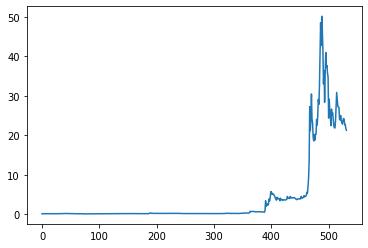

In [ ]:
import matplotlib.pyplot as plt
plt.plot(doge_data)

In [ ]:
###LSTM are Sensitive to the scale of the data.So we apply MinMax Scaler


In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
doge_data=scaler.fit_transform(np.array(doge_data).reshape(-1,1))

In [ ]:
doge_data

array([[6.06212185e-04],
       [5.77034930e-04],
       [7.89443895e-04],
       [9.26702813e-04],
       [1.18182926e-03],
       [1.24635484e-03],
       [1.21128625e-03],
       [9.86475327e-04],
       [9.22668718e-04],
       [1.05467552e-03],
       [9.93484999e-04],
       [1.08870553e-03],
       [1.04520926e-03],
       [1.21000811e-03],
       [1.06040705e-03],
       [1.03760055e-03],
       [1.24753299e-03],
       [1.27185749e-03],
       [1.12736898e-03],
       [1.08291418e-03],
       [1.09299942e-03],
       [1.01441432e-03],
       [9.45195788e-04],
       [9.56659152e-04],
       [9.30277731e-04],
       [9.97698836e-04],
       [1.09331903e-03],
       [1.19994281e-03],
       [1.11808276e-03],
       [1.20295826e-03],
       [1.13262140e-03],
       [1.17326172e-03],
       [1.23958473e-03],
       [1.19017718e-03],
       [1.26986038e-03],
       [1.38573080e-03],
       [1.49279382e-03],
       [1.66925541e-03],
       [2.22605991e-03],
       [2.33126598e-03],


In [ ]:
###spiliting data into train and test split

training_size=int(len(doge_data)*0.70)
test_size=len(doge_data)-training_size
train_data,test_data=doge_data[0:training_size,:],doge_data[training_size:len(doge_data),:1]

In [ ]:
training_size,test_size

(372, 160)

In [ ]:
import numpy
#convert a array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [ ]:
## Reshape into X=t,t+1,t+2,t+3 and Y=t+4

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [ ]:
print(X_train)

[[6.06212185e-04 5.77034930e-04 7.89443895e-04 9.26702813e-04
  1.18182926e-03 1.24635484e-03 1.21128625e-03 9.86475327e-04
  9.22668718e-04 1.05467552e-03 9.93484999e-04 1.08870553e-03
  1.04520926e-03 1.21000811e-03 1.06040705e-03 1.03760055e-03
  1.24753299e-03 1.27185749e-03 1.12736898e-03 1.08291418e-03
  1.09299942e-03 1.01441432e-03 9.45195788e-04 9.56659152e-04
  9.30277731e-04 9.97698836e-04 1.09331903e-03 1.19994281e-03
  1.11808276e-03 1.20295826e-03 1.13262140e-03 1.17326172e-03
  1.23958473e-03 1.19017718e-03 1.26986038e-03 1.38573080e-03
  1.49279382e-03 1.66925541e-03 2.22605991e-03 2.33126598e-03
  1.96713922e-03 2.04370697e-03 2.11909657e-03 2.02217861e-03
  2.18567908e-03 1.88531905e-03 1.67792265e-03 1.58016578e-03
  1.77396214e-03 1.46832975e-03 1.53163701e-03 1.51685852e-03
  1.44957728e-03 1.56261169e-03 1.44094992e-03 1.26942084e-03
  1.06314307e-03 1.04207388e-03 1.01371559e-03 9.36029203e-04
  9.93644803e-04 1.11179177e-03 1.37967965e-03 1.23455193e-03
  1.4108

In [ ]:
print(X_train.shape), print(y_train.shape)

(1, 100)
(1,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape)

(1, 100)
(1,)


(None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 5.4275e-07 - val_loss: 0.1999
Epoch 2/100
1/1 [==============================] - 0s 110ms/step - loss: 4.0360e-04 - val_loss: 0.2121
Epoch 3/100
1/1 [==============================] - 0s 109ms/step - loss: 1.9647e-05 - val_loss: 0.2222
Epoch 4/100
1/1 [==============================] - 0s 106ms/step - loss: 6.4546e-05 - val_loss: 0.2255
Epoch 5/100
1/1 [==============================] - 0s 109ms/step - loss: 1.7080e-04 - val_loss: 0.2225
Epoch 6/100
1/1 [==============================] - 0s 105ms/step - loss: 1.4091e-04 - val_loss: 0.2162
Epoch 7/100
1/1 [==============================] - 0s 101ms/step - loss: 5.4747e-05 - val_loss: 0.2089
Epoch 8/100
1/1 [==============================] - 0s 103ms/step - loss: 2.8339e-06 - val_loss: 0.2021
Epoch 9/100
1/1 [==============================] - 0s 113ms/step - loss: 1.4442e-05 - val_loss: 0.1978
Epoch 10/100
1/1 [==============================] - 0s 109ms/step - loss: 5.

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
## Prediction and Performance matrix

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
df1 = scaler.inverse_transform(doge_data)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.1524404933897687

In [ ]:
##Test data RMSE

math.sqrt(mean_squared_error(y_test,test_predict))

0.28435225346421167

In [ ]:
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = numpy.empty_like(doge_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [ ]:
testPredictPlot = numpy.empty_like(doge_data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(doge_data)-1, :] = test_predict





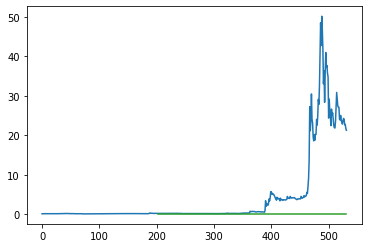

In [ ]:
plt.plot(scaler.inverse_transform(doge_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

160

In [ ]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
##demonstrate prediction for next 10 days

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)

    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    #print(x_input)

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]

    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1

  else:

      x_input = x_input.reshape((1, n_steps,1))
      yhat = model.predict(x_input, verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1

      print(lst_output)
            





                            


0 day input [8.83448214e-02 8.27716235e-02 8.03886959e-02 8.25897476e-02
 8.12702974e-02 8.09933078e-02 8.20998092e-02 8.30145215e-02
 8.04831715e-02 7.71617580e-02 7.53771715e-02 7.27233775e-02
 7.23222249e-02 7.57735723e-02 7.63892068e-02 7.54073445e-02
 7.62365135e-02 7.67739659e-02 7.61582647e-02 8.84381258e-02
 8.22140351e-02 7.94881726e-02 8.18330566e-02 8.50769879e-02
 9.23054956e-02 8.54227416e-02 8.92170049e-02 8.97722125e-02
 9.29975648e-02 1.09121612e-01 1.03697599e-01 1.38016112e-01
 1.79788309e-01 2.69635347e-01 5.42527267e-01 4.20819978e-01
 4.74930949e-01 6.06809385e-01 4.79131340e-01 4.60065062e-01
 3.89072077e-01 3.69280124e-01 4.01735226e-01 3.73170149e-01
 4.02133660e-01 4.03091386e-01 4.78080328e-01 4.49351382e-01
 4.97218560e-01 5.79235288e-01 5.54163096e-01 6.49052703e-01
 7.95330560e-01 9.66943781e-01 8.51587131e-01 1.00000000e+00
 9.29319438e-01 8.32108441e-01 6.58196416e-01 7.23406855e-01
 5.64788747e-01 7.16975234e-01 8.16661626e-01 7.41100897e-01
 7.51233077e

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(doge_data)

532

In [ ]:
df = doge_data.tolist()
df.extend(lst_output)

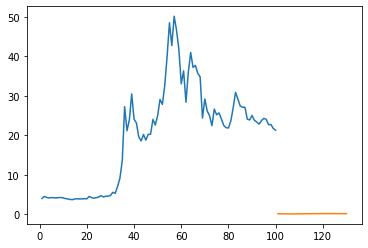

In [ ]:
plt.plot(day_new,scaler.inverse_transform(doge_data[432:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

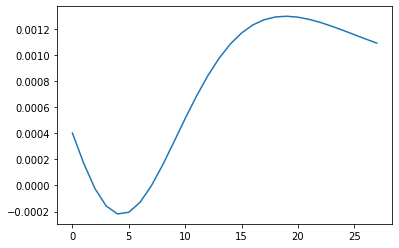

In [ ]:
df=doge_data.tolist()
df.extend(lst_output)
plt.plot(df[534:])